In [1]:
##Calculates the Balmer Temperature from a given Balmer jump measurement.

In [2]:
#import useful packages
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
from astropy.io import fits 
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["text.usetex"] = True
mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]
mpl.rcParams["errorbar.capsize"] = 5
mpl.rcParams["axes.linewidth"] = 2
mpl.rcParams["xtick.major.size"] = 16
mpl.rcParams["xtick.major.width"] = 2
mpl.rcParams["xtick.minor.size"] = 8
mpl.rcParams["xtick.minor.width"] = 1
mpl.rcParams["ytick.major.size"] = 16
mpl.rcParams["ytick.major.width"] = 2
mpl.rcParams["ytick.minor.size"] = 8
mpl.rcParams["ytick.minor.width"] = 1
mpl.rcParams["axes.labelsize"] = 30
mpl.rcParams["xtick.labelsize"] = 25
mpl.rcParams["ytick.labelsize"] = 25
mpl.rcParams["legend.fontsize"] = 30
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["ytick.right"] = True
mpl.rcParams["xtick.top"] = True
mpl.rcParams["xtick.minor.visible"] = True
mpl.rcParams["ytick.minor.visible"] = True

In [3]:
# Read the files into arrays
regionName = np.loadtxt("regions.list",  dtype=str) 
galaxyData = np.loadtxt("fits.list",     dtype=str)    

# Determine number of regions in our galaxy
nn = len(regionName)   

In [4]:
def getCHAOSdata(nn, galaxyData, filenameTemps, filenameData):  
    with open(filenameTemps, "w") as text_file:
        print('#Region ', 'OIII  ','OIIIErr  ','NII  ', 'NIIErr ','SIII  ','SIIIErr  ','OIIIFinal ','OIIIFinalErr ','NIIFinal  ','NIIFinalErr  ','SIIIFinal  ','SIIIFinalErr  ', file=text_file) 
    with open(filenameData, "w") as text_file:
        print('#Region ', 'fluxH11  ','fluxH11Err  ','EBV  ', 'EBVErr ', file=text_file) 

    for i in range(0,nn):
        region = regionName[i]

        reg        = fits.open(galaxyData[i])         # opens fits file
        lines      = reg[1].data                 # fits file data access
        flux       = reg[3].data
        temden     = reg[4].data
        tfinColumn = reg[6].data

        H11      = (lines['WAVELENGTH'] == 3770.633)
        HB       = (lines['WAVELENGTH'] == 4861.3500)
        fluxH11  = str(lines['Flux'][H11]).strip('[').strip(']')       
        errH11   = str(lines['F_unc'][H11]).strip('[').strip(']')
        EBV      = str(flux['CHBETA'][HB]).strip('[').strip(']')
        EBVErr   = str(flux['CHBETA_UNC'][HB]).strip('[').strip(']')
        
        to3   = (temden['ION']  == '[O III]')
        tn2   = (temden['ION']  == '[N II]')
        ts3   = (temden['ION']  == '[S III]')
        tused = (temden['ION']  == 'FINAL')

        T_OIII     = str(temden['T_OIII'][to3]).strip('[').strip(']')
        T_NII      = str(temden['T_OII'] [tn2]).strip('[').strip(']')
        T_SIII     = str(temden['T_SIII'][ts3]).strip('[').strip(']')
        T_OIII_UNC = str(temden['T_OIII_UNC'][to3]).strip('[').strip(']')
        T_NII_UNC  = str(temden['T_OII_UNC'] [tn2]).strip('[').strip(']')
        T_SIII_UNC = str(temden['T_SIII_UNC'][ts3]).strip('[').strip(']')

        T_OIII_USED     = str(temden['T_OIII'][tused]).strip('[').strip(']')
        T_NII_USED      = str(temden['T_OII'][tused]).strip('[').strip(']')
        T_SIII_USED     = str(temden['T_SIII'][tused]).strip('[').strip(']')
        T_OIII_USED_UNC = str(temden['T_OIII_UNC'][tused]).strip('[').strip(']')
        T_NII_USED_UNC  = str(temden['T_OII_UNC'][tused]).strip('[').strip(']')
        T_SIII_USED_UNC = str(temden['T_SIII_UNC'][tused]).strip('[').strip(']')

        tempsArray = [T_OIII, T_OIII_UNC, T_NII, T_NII_UNC, T_SIII, T_SIII_UNC, T_OIII_USED, T_OIII_USED_UNC, 
                  T_NII_USED, T_NII_USED_UNC, T_SIII_USED, T_SIII_USED_UNC]
    
        dataArray = [fluxH11, errH11, EBV, EBVErr]
        
        with open(filenameTemps, "a") as text_file:
            print(region, " ".join(str(x) for x in tempsArray), file=text_file)
        with open(filenameData, "a") as text_file:
            print(region, " ".join(str(x) for x in dataArray), file=text_file) 
            
def findUsedTemps(nn, filenameAll, filenameUsed):
    
    tOIII, tOIIIerr, tNII, tNIIerr, tSIII, tSIIIerr, tOIIIused, tOIIIusedErr, tNIIused, tNIIusedErr, tSIIIusedErr, tSIIIusedErr = np.loadtxt(filenameAll, unpack=True, usecols=(1,2,3,4,5,6,7,8,9,10,11,12))
    tOIIIflags, tNIIflags, tSIIIflags = [0]*nn, [0]*nn, [0]*nn

    with open(filenameUsed, "w") as text_file:
        print('#Flag = 0: Ion temp was directly measured. Flag = 1: Ion temp not directly measured.', file=text_file)
        print('#Region ', 'OIII  ','OIIIErr  ', 'OIIIFlag  ','NII  ', 'NIIErr ', 'NIIFlag  ','SIII  ','SIIIErr  ', 'SIIIFlag  ', file=text_file) 
        
    for i in range(0,nn):
    
        region = regionName[i]
    
        if tOIII[i] < 1:
            tOIII[i]      =  tOIIIused[i]
            tOIIIerr[i]   =  tOIIIusedErr[i]
            tOIIIflags[i] = 1
        if tNII[i]  < 1:
            tNII[i]      = tNIIused[i]
            tNIIerr[i]   = tNIIusedErr[i]
            tNIIflags[i] = 1
        if tSIII[i]  < 1:
            tSIII[i]      = tSIIIused[i]
            tSIIIerr[i]   = tSIIIusedErr[i]
            tSIIIflags[i] = 1
        
        tempsArray = [tOIII[i], tOIIIerr[i], tOIIIflags[i], tNII[i], tNIIerr[i], tNIIflags[i], tSIII[i], tSIIIerr[i], tSIIIflags[i]]
        
        with open(filenameUsed, "a") as text_file:
            print(region, " ".join(str(x) for x in tempsArray), file=text_file)
    
    
def correctRatio(flux, fluxErr, H11, H11Err, EC, H11EC, EBV, EBVErr):

    ratio    = flux / H11
    ratioErr = np.abs(ratio) * ((fluxErr/flux)**2 + (H11Err/H11)**2)**0.5
    
    ratioCorr    = ratio + 10**(0.4*EBV*(EC-H11EC))
    ratioCorrErr = ((ratioErr)**2 + ((0.4*(EC-H11EC))*np.log(10)*10**(0.4*EBV*(EC-H11EC))*EBVErr)**2)**0.5
    
    return(ratioCorr, ratioCorrErr)
    
def reddeningCorrectData(red, redErr, blue, blueErr, fluxH11, fluxH11Err, redEC, blueEC, H11EC, EBV, EBVErr):
    
    redRatio, redRatioErr = correctRatio(red, redErr, fluxH11, fluxH11Err, redEC, H11EC, EBV, EBVErr)
    blueRatio, blueRatioErr = correctRatio(blue, blueErr, fluxH11, fluxH11Err, blueEC, H11EC, EBV, EBVErr)

    jumpRatio = blueRatio - redRatio
    jumpRatioErr = (blueRatioErr**2+redRatioErr**2)**0.5
    
    return(jumpRatio, jumpRatioErr)

def balmerTemp(jumpRatio, jumpRatioErr):
   
    x    = np.log10(jumpRatio)
    xErr = jumpRatioErr / (jumpRatio * np.log(10))
    
    a, b, c = -1.148, -3.893, 1.354    # From Danielle's Model
    
    TBac    = 10**(a * x**2 + b * x + c)
    TBacErr = xErr * np.log(10) * np.abs(2*a*x + b) * TBac
    
    return(TBac, TBacErr)

In [6]:
# read in the ion temperatures here and determine which were directly measured
fileNameAll  = 'NGC0628IonTemps.txt'
fileNameUsed = 'NGC0628UsedTemps.txt'
fileNameData = 'NGC0628CHAOSData.txt'
fileNameTBac = 'NCG0628TBac.txt'

#Temps stored into files for later retrieval
getCHAOSdata(nn, galaxyData, fileNameAll, fileNameData)
findUsedTemps(nn, fileNameAll, fileNameUsed)

# read in the jump values here
blueObs, blueObsErr, redObs, redObsErr, redCRF, redCRFErr, redCNF, redCNFErr = np.loadtxt('NGC0628MultiFitData.txt', unpack=True, usecols=(1,2,3,4,5,6,7,8))
blueCS, blueCSErr, redCS, redCSErr = np.loadtxt('NGC0628ContSubFitData.txt', unpack=True, usecols=(1,2,3,4))

# reddening correction here
# Using McCall 2004 York Extinction Solver and Cardelli et al 1989 reddening law.
ABlue = 4.74674
ARed  = 4.71963
AH11  = 4.65294

fluxH11, fluxH11Err, EBV, EBVErr = np.loadtxt(fileNameData, unpack=True, usecols=(1,2,3,4))

#Later turn the rest of this cell into a function after word back from team. Also print temps somewhere
jumpRatioObs, jumpRatioObsErr = [0]*nn,[0]*nn
TBacObs, TBacObsErr = [0]*nn,[0]*nn
jumpRatioCRF, jumpRatioCRFErr = [0]*nn,[0]*nn
TBacCRF, TBacCRFErr = [0]*nn,[0]*nn
jumpRatioCNF, jumpRatioCNFErr = [0]*nn,[0]*nn
TBacCNF, TBacCNFErr = [0]*nn,[0]*nn
jumpRatioCS, jumpRatioCSErr = [0]*nn,[0]*nn
TBacCS, TBacCSErr = [0]*nn,[0]*nn

with open(fileNameTBac, "w") as text_file:
    print('#Region ', 'TBacObs  ','TBacObsErr  ','TBacCRF  ','TBacCRFErr  ','TBacCNF  ','TBacCNFErr  ','TBacCS  ','TBacCSErr  ', file=text_file) 
    
for i in range(0,nn):
    
    region = regionName[i]
    
    jumpRatioObs[i], jumpRatioObsErr[i] = reddeningCorrectData(redObs[i], redObsErr[i], blueObs[i], blueObsErr[i], fluxH11[i], fluxH11Err[i], ARed, ABlue, AH11, EBV[i], EBVErr[i])
    jumpRatioCRF[i], jumpRatioCRFErr[i] = reddeningCorrectData(redCRF[i], redCRFErr[i], blueObs[i], blueObsErr[i], fluxH11[i], fluxH11Err[i], ARed, ABlue, AH11, EBV[i], EBVErr[i])
    jumpRatioCNF[i], jumpRatioCNFErr[i] = reddeningCorrectData(redCNF[i], redCNFErr[i], blueObs[i], blueObsErr[i], fluxH11[i], fluxH11Err[i], ARed, ABlue, AH11, EBV[i], EBVErr[i])
    jumpRatioCS[i],  jumpRatioCSErr[i]  = reddeningCorrectData(redCS[i], redCSErr[i], blueCS[i], blueCSErr[i], fluxH11[i], fluxH11Err[i], ARed, ABlue, AH11, EBV[i], EBVErr[i])

# calculate temperatures
    TBacObs[i], TBacObsErr[i] = balmerTemp(jumpRatioObs[i], jumpRatioObsErr[i])
    TBacCRF[i], TBacCRFErr[i] = balmerTemp(jumpRatioCRF[i], jumpRatioCRFErr[i])
    TBacCNF[i], TBacCNFErr[i] = balmerTemp(jumpRatioCNF[i], jumpRatioCNFErr[i])
    TBacCS[i],  TBacCSErr[i]  = balmerTemp(jumpRatioCS[i], jumpRatioCSErr[i])
    
    TBacArray = [TBacObs[i], TBacObsErr[i], TBacCRF[i], TBacCRFErr[i],TBacCNF[i], TBacCNFErr[i],TBacCS[i], TBacCSErr[i]]
    
    with open(fileNameTBac, "a") as text_file:
        print(region, " ".join(str(x) for x in TBacArray), file=text_file)
        


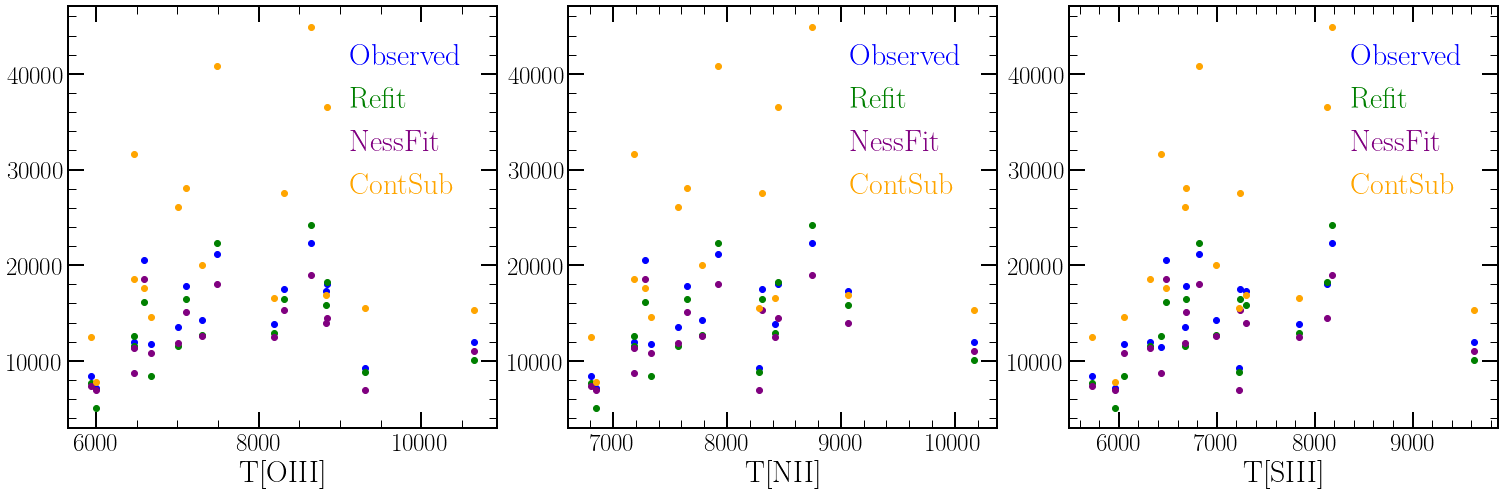

In [7]:
#Make some rudimentary Plots
#If flag=0, ion temp was directly measured. 
TBacObs, TBacObsErr, TBacCRF, TBacCRFErr, TBacCNF, TBacCNFErr, TBacCS, TBacCSErr = np.loadtxt(fileNameTBac, unpack=True, usecols=(1,2,3,4,5,6,7,8))
tOIII, tOIIIerr, tOIIIflags, tNII, tNIIerr, tNIIflags, tSIII, tSIIIerr, tSIIIflags = np.loadtxt(fileNameUsed, unpack=True, usecols=(1,2,3,4,5,6,7,8,9))

def make_legend(ax, labels, colors): 
    lines = len(labels) * [None] 
    for i in range(len(lines)): 
        lines[i] = ax.plot([8000, 9000], [10000, 20000], c = "w", label = labels[i])[0] 
    leg = ax.legend(loc = 1, ncol = 1, frameon = False, bbox_to_anchor = (0.98, 0.98), handlelength = 0) 
    for i in range(len(lines)): 
        lines[i].remove() 
        leg.get_texts()[i].set_color(colors[i]) 

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figheight(7)
fig.set_figwidth(21)
ax1.set_xlabel('T[OIII]')
ax1.scatter(tOIII, TBacObs, color='blue')
#ax1.errorbar(tOIII, TBacObs, xerr=tOIIIerr, yerr=TBacObsErr, fmt = " ", color = "blue", alpha=0.3, capsize = 5)
ax1.scatter(tOIII, TBacCRF, color='green')
ax1.scatter(tOIII, TBacCNF, color='purple')
ax1.scatter(tOIII, TBacCS,  color='orange')
# ax1.legend(loc='best')
make_legend(ax1, ["Observed", "Refit", "NessFit", "ContSub"], ["blue", "green", "purple", "orange"]) 
ax2.set_xlabel('T[NII]')
ax2.scatter(tNII, TBacObs, color='blue')
ax2.scatter(tNII, TBacCRF, color='green')
ax2.scatter(tNII, TBacCNF, color='purple')
ax2.scatter(tNII, TBacCS,  color='orange')
# ax2.legend(loc='best')
make_legend(ax2, ["Observed", "Refit", "NessFit", "ContSub"], ["blue", "green", "purple", "orange"]) 
ax3.set_xlabel('T[SIII]')
ax3.scatter(tSIII, TBacObs, color='blue')
ax3.scatter(tSIII, TBacCRF, color='green')
ax3.scatter(tSIII, TBacCNF, color='purple')
ax3.scatter(tSIII, TBacCS,  color='orange')
# ax3.legend(loc='best')
make_legend(ax3, ["Observed", "Refit", "NessFit", "ContSub"], ["blue", "green", "purple", "orange"]) 
plt.tight_layout()


In [ ]:
import matplotlib as mpl 
print(mpl.__version__)